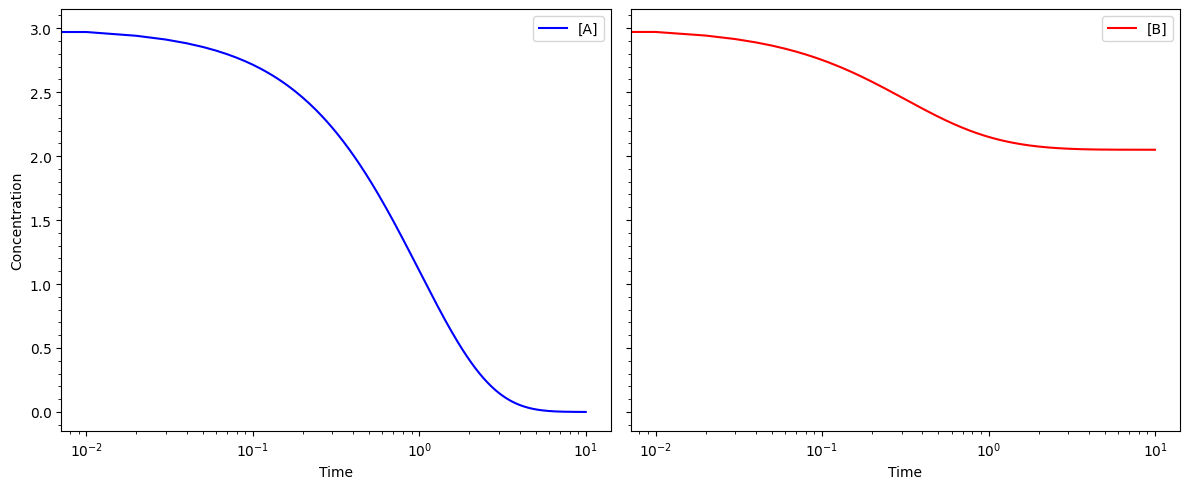

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint

def dEdt(t, E, k1, k2, V):
    A, B = E
    return [-k1*A, 
            2*k1*A - k2*A*B]

A0 = 3; B0 = 3
dt = 0.01

time = 1000
time_array = np.arange(0, time*dt, dt)

V = 10
sol = odeint(dEdt, y0 = (A0, B0), t = time_array, args = (1, 1, V), tfirst=True) 
sol = sol.T 

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,5))

axes[0].set_ylabel("Concentration")
axes[0].plot(time_array, sol[0], label='[A]', color='blue')
axes[1].plot(time_array, sol[1], label='[B]', color='red')
# axes[2].plot(time_array, sol[2], label='[C]', color='green')
for ax in axes:
    ax.set_xlabel("Time")
    ax.set_xscale('log')
    ax.legend()

plt.minorticks_on()
plt.tight_layout()
plt.show()

# MOLECULE ODE SOLVER:

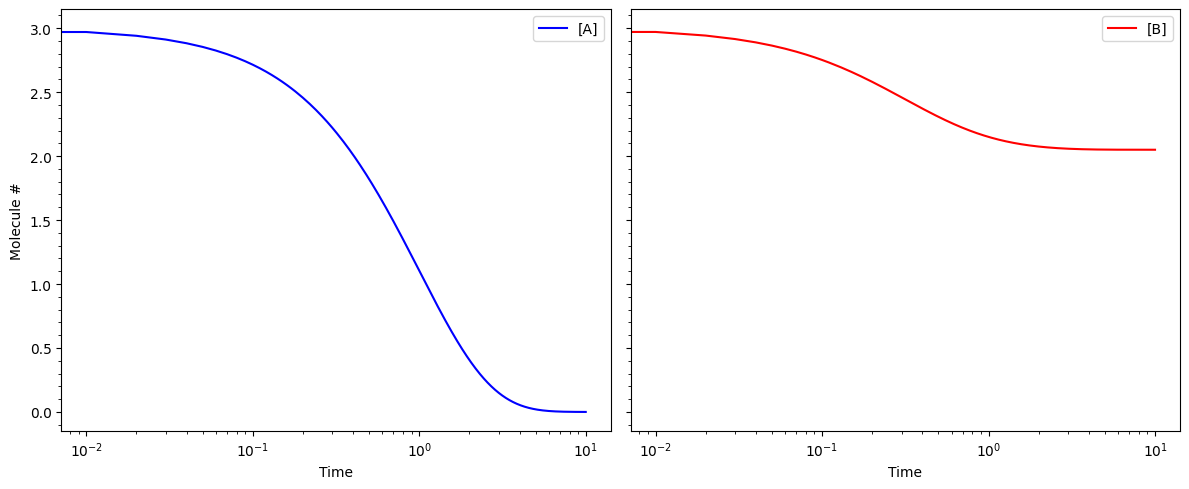

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint

def dEdt(t, E, k1, k2, V):
    A, B = E
    return [-k1*A, 
            2*k1*A - k2*A*B / V]

A0 = 3; B0 = 3
dt = 0.01

time = 1000
time_array = np.arange(0, time*dt, dt)

V = 100
sol = odeint(dEdt, y0 = (A0 * V, B0 * V), t = time_array, args = (1, 1, V), tfirst=True) 
sol = sol.T 

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,5))

axes[0].set_ylabel("Molecule #")
axes[0].plot(time_array, sol[0] / V, label='[A]', color='blue')
axes[1].plot(time_array, sol[1] / V, label='[B]', color='red')
# axes[2].plot(time_array, sol[2], label='[C]', color='green')
for ax in axes:
    ax.set_xlabel("Time")
    ax.set_xscale('log')
    ax.legend()

plt.minorticks_on()
plt.tight_layout()
plt.show()

# EULER-MARUYAMA METHOD:

/var/folders/2h/xz8d592j62n7f363_sbw7ly00000gn/T/ipykernel_67509/2881022944.py:13: RuntimeWarning: invalid value encountered in sqrt
  dA = - np.sqrt(k1*u[0])
/var/folders/2h/xz8d592j62n7f363_sbw7ly00000gn/T/ipykernel_67509/2881022944.py:14: RuntimeWarning: invalid value encountered in sqrt
  dB = np.sqrt(2*k1*u[0]) - np.sqrt(k2*u[0]*u[1] / V)


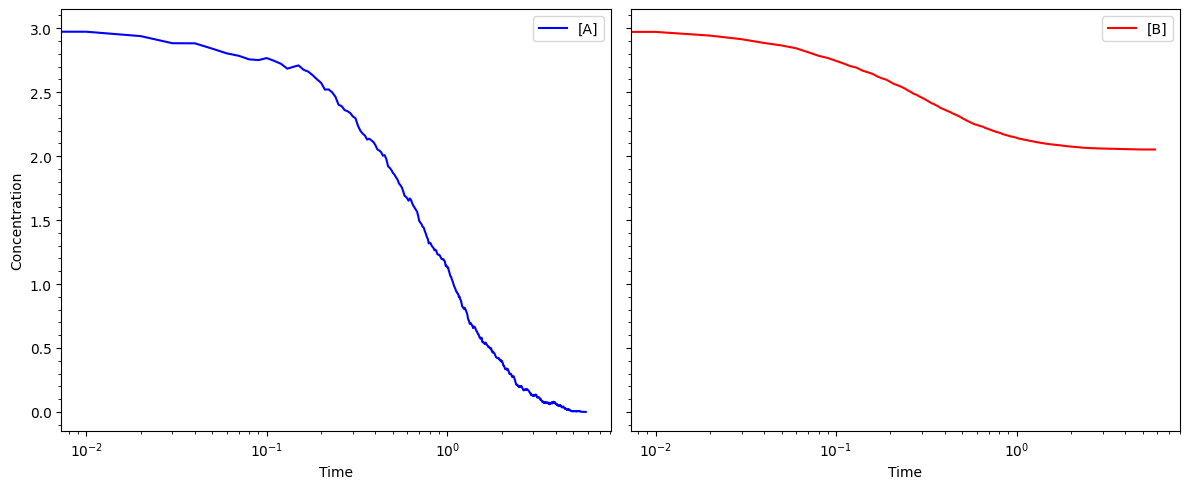

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def f(u, p):
    A, B = u
    k1, k2, V = p
    dA = -k1*A
    dB = 2*k1*A - k2*A*B / V
    return np.array([dA, dB])

def g(u, p):    
    k1, k2, V = p
    dA = - np.sqrt(k1*u[0])
    dB = np.sqrt(2*k1*u[0]) - np.sqrt(k2*u[0]*u[1] / V)
    return np.array([dA, dB])

dt = 0.01
V = 100
time = 1000
time_array = np.arange(0, time*dt, dt)
A_initial = 3; B_initial = 3
x_array = np.empty((time, 2)); x_array[0] = initial_state = np.array([A_initial, B_initial]) * V

for i, xi in enumerate(x_array[:-1]):
    x_array[i+1] = xi + f(xi, (1,1,V)) * dt + g(xi, (1,1,V)) * np.random.normal(0, np.sqrt(dt), 2)

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,5))
axes[0].set_ylabel("Concentration")

axes[0].plot(time_array, x_array[:,0] / V, label='[A]', color='blue')
axes[1].plot(time_array, x_array[:,1] / V, label='[B]', color='red')
# axes[2].plot(time_array, x_array[:,2], label='[C]', color='green')
for ax in axes:
    ax.set_xlabel("Time")
    ax.set_xscale('log')
    ax.legend()
plt.minorticks_on()
plt.tight_layout()
plt.show()